#**Install Requirement Library**

In [1]:
!pip install anytree
!pip install basemap
!pip install mycolorpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 962.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.8/935.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 16.2 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3851 sha256=bc998592d037bf7c608d8733836ffec8467c2ae546fbb6487b6aa580837c6678
  Stored in directory: /root/.cache/pip/wheels/d6/1d/04/f8bfb8b04e3daba330b3f377c041b89304271ff98fb6704946
Successfully built mycolorpy


#**Import Library**

In [2]:
import pandas as pd
import numpy as np
import graphviz
import math
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import timedelta, datetime
from mycolorpy import colorlist as mcp

%matplotlib inline

#**Read Dataset**

In [3]:
#dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1952_2022.csv"
#df = pd.read_csv(dataset)
#df.head(10)

dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(dataset)
df.head(15)

# Konversi kolom 'time' ke format datetime
#df['time'] = pd.to_datetime(df['time'])

# Seleksi data hanya untuk tahun 1972 - 2022
#df_selected = df[(df['time'].dt.year >= 1972) & (df['time'].dt.year <= 2022)]

# Tampilkan lima baris pertama dari data terpilih
#df_selected.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1968-01-01T07:50:51.240Z,32.958667,-115.863333,6.00,3.08,ml,5.0,166.0,0.73550,0.29,...,2016-01-28T19:54:48.710Z,"24km WSW of Westmorland, CA",earthquake,1.02,31.61,0.179,5.0,reviewed,ci,ci
1,1968-01-01T11:34:43.790Z,33.468333,-120.179500,6.00,2.59,mh,4.0,302.0,1.04400,0.63,...,2016-01-28T19:37:37.050Z,"53km S of Santa Rosa Is., CA",earthquake,5.56,31.61,0.306,12.0,reviewed,ci,ci
2,1968-01-02T09:50:46.470Z,35.705167,-118.039000,6.00,3.09,ml,8.0,84.0,0.35670,0.71,...,2016-01-28T19:33:22.000Z,"22km WNW of Inyokern, CA",earthquake,1.78,31.61,0.155,11.0,reviewed,ci,ci
3,1968-01-02T11:01:19.830Z,35.740667,-118.060833,6.00,2.88,ml,10.0,97.0,0.34520,0.52,...,2016-01-28T19:59:01.740Z,"25km WNW of Inyokern, CA",earthquake,1.13,31.61,0.167,9.0,reviewed,ci,ci
4,1968-01-04T06:12:39.730Z,35.111000,-119.085833,6.00,2.59,ml,9.0,146.0,0.28340,0.45,...,2016-01-28T19:54:49.210Z,"23km SW of Lamont, CA",earthquake,1.03,31.61,0.136,6.0,reviewed,ci,ci
5,1968-01-04T06:19:26.850Z,35.118333,-119.099167,6.00,2.37,ml,8.0,147.0,0.29550,0.47,...,2016-01-28T19:50:28.820Z,"23km SW of Lamont, CA",earthquake,1.35,31.61,0.115,6.0,reviewed,ci,ci
6,1968-01-04T11:37:09.810Z,32.276000,-117.088833,6.00,3.31,ml,4.0,234.0,0.53510,0.36,...,2016-01-28T19:37:37.540Z,"8km SW of Rosarito, B.C., MX",earthquake,2.13,31.61,0.934,2.0,reviewed,ci,ci
7,1968-01-05T10:50:56.490Z,35.687500,-118.114000,6.00,2.84,ml,8.0,70.0,0.29420,0.63,...,2016-01-28T19:41:48.200Z,"28km W of Inyokern, CA",earthquake,1.44,31.61,0.219,9.0,reviewed,ci,ci
8,1968-01-06T00:26:00.650Z,35.089833,-119.059167,5.00,3.01,ml,11.0,142.0,0.25390,0.47,...,2016-01-28T19:41:48.730Z,"20km NW of Grapevine, CA",earthquake,1.05,31.61,0.106,11.0,reviewed,ci,ci
9,1968-01-09T23:06:13.520Z,34.863833,-118.734833,0.38,2.21,mh,9.0,107.0,0.13620,0.54,...,2016-01-28T19:59:02.950Z,"12km ENE of Lebec, CA",earthquake,2.27,6.13,0.213,15.0,reviewed,ci,ci


In [4]:
import pandas as pd
from datetime import datetime

# Load dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(dataset)

# Filter hanya untuk magnitudo >= 3
df_filtered = df[df['mag'] >= 3.0]

# Tampilkan hasil
df = df_filtered
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1968-01-01T07:50:51.240Z,32.958667,-115.863333,6.0,3.08,ml,5.0,166.0,0.73550,0.29,...,2016-01-28T19:54:48.710Z,"24km WSW of Westmorland, CA",earthquake,1.02,31.61,0.179,5.0,reviewed,ci,ci
2,1968-01-02T09:50:46.470Z,35.705167,-118.039000,6.0,3.09,ml,8.0,84.0,0.35670,0.71,...,2016-01-28T19:33:22.000Z,"22km WNW of Inyokern, CA",earthquake,1.78,31.61,0.155,11.0,reviewed,ci,ci
6,1968-01-04T11:37:09.810Z,32.276000,-117.088833,6.0,3.31,ml,4.0,234.0,0.53510,0.36,...,2016-01-28T19:37:37.540Z,"8km SW of Rosarito, B.C., MX",earthquake,2.13,31.61,0.934,2.0,reviewed,ci,ci
8,1968-01-06T00:26:00.650Z,35.089833,-119.059167,5.0,3.01,ml,11.0,142.0,0.25390,0.47,...,2016-01-28T19:41:48.730Z,"20km NW of Grapevine, CA",earthquake,1.05,31.61,0.106,11.0,reviewed,ci,ci
10,1968-01-11T23:17:01.860Z,33.417500,-116.809333,18.0,3.26,ml,5.0,210.0,0.07778,0.53,...,2016-01-28T19:54:49.740Z,"6km ESE of Aguanga, CA",earthquake,2.97,31.61,0.019,5.0,reviewed,ci,ci
14,1968-01-14T21:22:00.940Z,33.042667,-116.458833,6.0,3.33,ml,8.0,118.0,0.40370,0.73,...,2016-01-28T19:46:05.640Z,"14km ESE of Julian, CA",earthquake,1.41,31.61,0.153,8.0,reviewed,ci,ci
18,1968-01-17T19:34:56.300Z,33.026667,-116.381000,6.0,3.05,ml,7.0,128.0,0.42370,0.46,...,2016-01-28T19:50:29.320Z,"21km ESE of Julian, CA",earthquake,1.21,31.61,0.086,4.0,reviewed,ci,ci
19,1968-01-18T21:22:33.780Z,33.908167,-118.450333,6.0,3.11,ml,12.0,111.0,0.33350,0.71,...,2016-01-28T19:54:50.240Z,"3km WSW of El Segundo, CA",earthquake,1.22,31.61,0.164,8.0,reviewed,ci,ci
23,1968-01-19T16:21:19.920Z,35.838000,-119.859667,6.0,3.21,ml,7.0,221.0,1.14100,0.32,...,2016-01-28T19:59:04.030Z,"21km SSE of Kettleman City, CA",earthquake,1.70,31.61,0.039,3.0,reviewed,ci,ci
24,1968-01-21T00:28:30.060Z,33.701833,-117.936167,6.0,3.03,ml,10.0,106.0,0.48640,0.64,...,2016-01-28T19:59:04.560Z,"2km ESE of Fountain Valley, CA",earthquake,1.29,31.61,0.110,4.0,reviewed,ci,ci


#**Feature Description**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14457 entries, 0 to 247795
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             14457 non-null  object 
 1   latitude         14457 non-null  float64
 2   longitude        14457 non-null  float64
 3   depth            14457 non-null  float64
 4   mag              14457 non-null  float64
 5   magType          14457 non-null  object 
 6   nst              14339 non-null  float64
 7   gap              14324 non-null  float64
 8   dmin             7753 non-null   float64
 9   rms              14348 non-null  float64
 10  net              14457 non-null  object 
 11  id               14457 non-null  object 
 12  updated          14457 non-null  object 
 13  place            14457 non-null  object 
 14  type             14457 non-null  object 
 15  horizontalError  8602 non-null   float64
 16  depthError       12840 non-null  float64
 17  magError   

In [6]:
data = df[['depth','mag']]
data.describe()

,depth,mag
count,14457.000000,14457.000000
mean,6.382018,3.408318
std,4.728641,0.422892
min,-1.937000,3.000000
25%,3.013000,3.110000
50%,5.991000,3.280000
75%,9.633000,3.560000
max,65.556000,7.300000


#**Magnitude Type**

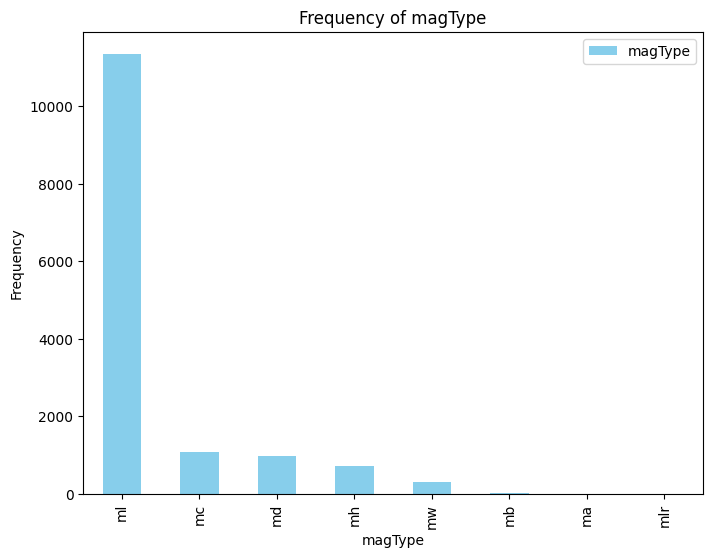

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung frekuensi setiap jenis 'magType'
magtype_counts = df['magType'].value_counts()

# Buat plot bar
plt.figure(figsize=(8, 6))
magtype_counts.plot(kind='bar', color='skyblue')

# Beri label sumbu x dan y serta judul grafik
plt.xlabel('magType')
plt.ylabel('Frequency')
plt.title('Frequency of magType')

# Tampilkan legenda
plt.legend(['magType'])

# Tampilkan grafik
plt.show()


#**Correlation Variable**

The correlation matrix showcases the relationships between the numeric variables within the dataset. For instance:

Positive Correlation: If two variables have a value close to +1, it implies a strong positive relationship. For instance, if variables A and B have a correlation coefficient of 0.8, it suggests that as variable A increases, variable B also tends to increase.

Negative Correlation: If two variables have a value close to -1, it signifies a strong negative relationship. For example, if variables C and D have a correlation coefficient of -0.6, it suggests that as variable C increases, variable D tends to decrease.

No Correlation: A correlation coefficient close to 0 indicates no linear relationship between the variables. If variables E and F have a correlation coefficient of 0.1, there's little to no linear relationship between them.

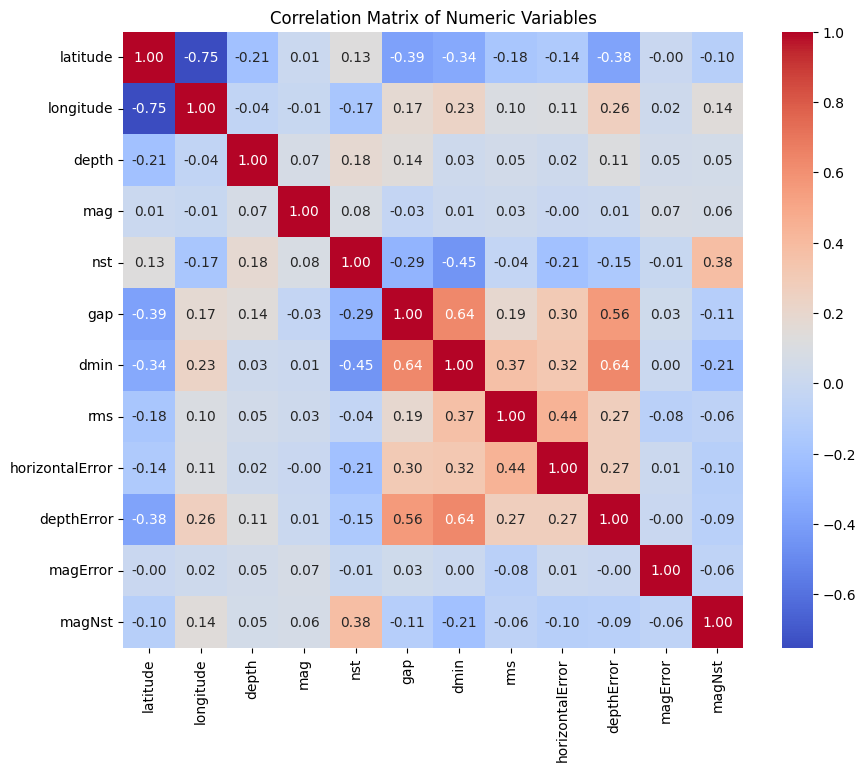

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom numerik untuk membuat matriks korelasi
numeric_data = df.select_dtypes(include='number')

# Hitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Buat heatmap untuk matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


**bold text**#**Statistical Description of Earthquake Events**

In [9]:
# Total earthquake events
N_tot = df['latitude'].count()
print('Total earthquake events **1968 until 2018**', N_tot)
print('Average number of events per week:', round(N_tot/(52*(2018-1968+1)),2) )
print('Average number of events per year:', round(N_tot/((2018-1968+1)),2) )

# List of largest earthquake events
print('The magnitude of the largest earthquake:')
df[['mag','time','place']].sort_values('mag',ascending=False).head(5)

Total earthquake events **1968 until 2018** 14457
Average number of events per week: 5.45
Average number of events per year: 283.47
The magnitude of the largest earthquake:


,mag,time,place
168133,7.3,1992-06-28T11:57:34.130Z,"Landers, California Earthquake"
227923,7.2,2010-04-04T22:40:42.360Z,"12km SW of Delta, B.C., MX"
201925,7.1,1999-10-16T09:46:44.460Z,"16km SW of Ludlow, CA"
64973,6.7,1983-05-02T23:42:38.060Z,Central California
186128,6.7,1994-01-17T12:30:55.390Z,"1km NNW of Reseda, CA"


In [10]:
print('Magnitude Maximum:', df['mag'].max())
print('Magnitude Minium:', df['mag'].min())
print('Magnitude Rata-Rata:', df['mag'].mean())

Magnitude Maximum: 7.3
Magnitude Minium: 3.0
Magnitude Rata-Rata: 3.408318461644878


In [11]:
from datetime import datetime

#Object Date Time
df['dt_time'] = pd.to_datetime(df['time'])

# Column year, month, and day
df['dofy'] = df['dt_time'].dt.strftime("%j").astype(int)
df['year'] = df['dt_time'].dt.year
df['month'] = df['dt_time'].dt.month
df['day'] = df['dt_time'].dt.day

# Calculate the number of earthquake events per time (DMY)
dofy_tot = df['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = df['year'].value_counts(sort=True)
month_tot = df['month'].value_counts(sort=True)
day_tot = df['day'].value_counts(sort=True)

# Calculate the number of earthquake events per time (DMY)
year_ave = year_tot.mean()
dofy_ave = dofy_tot.mean()
month_ave = month_tot.mean()


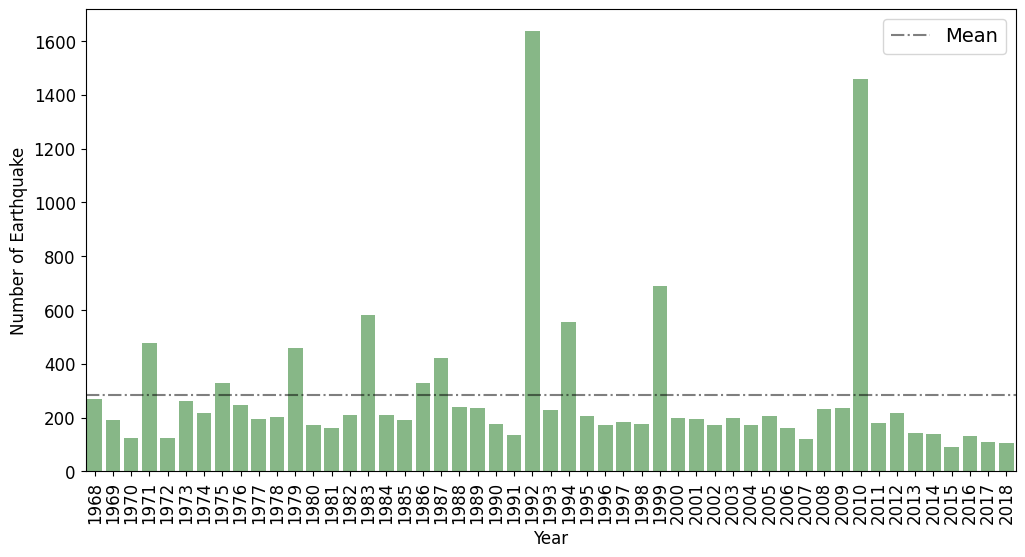

In [12]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(12,6))

sns.barplot(x=year_tot.index, y=year_tot.values, alpha=0.5, color='green')
plt.axhline(y=year_ave, color='k', linestyle='-.',
            alpha=0.5, label='Mean')
plt.xlabel('Year'), plt.ylabel('Number of Earthquake')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


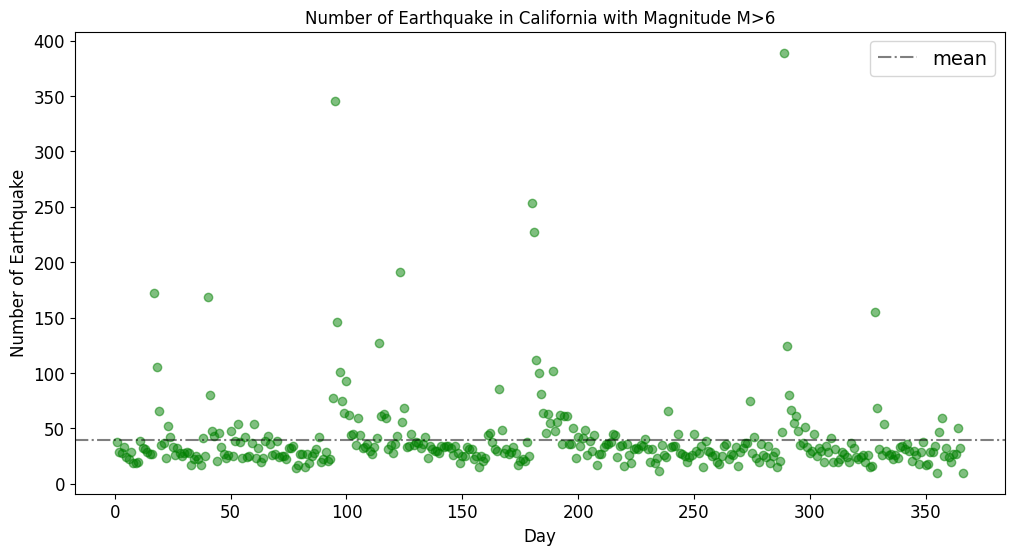

In [13]:
plt.figure(figsize=(12,6))

plt.plot(dofy_tot.index, dofy_tot.values ,'go', alpha=0.5)
plt.axhline(y=dofy_ave, color='k',linestyle='-.',alpha=0.5,label='mean')
plt.ylabel('Number of Earthquake'), plt.xlabel('Day')
plt.title('Number of Earthquake in California with Magnitude M>6')
plt.legend()
plt.show()

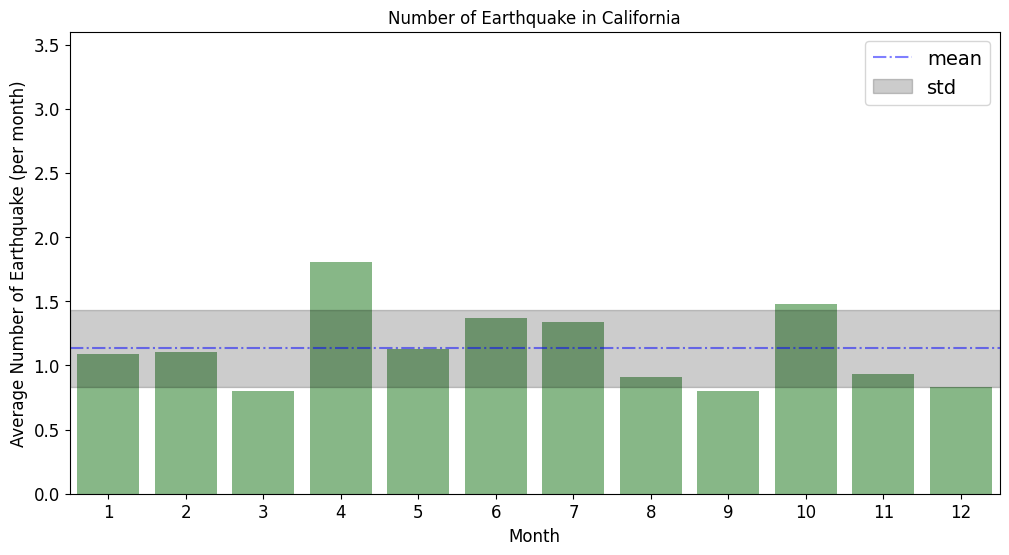

In [14]:
# Array of month lengths
month_length = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# Sort by month index
month_sort = month_tot.sort_index()
# Normalize by the length of the month
month_norm = month_sort.values / (month_length*(2017-1983+1))

# Plot (including daily average and the deviation)
plt.figure(figsize=(12,6))

ax = sns.barplot(x=month_sort.index, y=month_norm, alpha=0.5, color='green')
ax.set_ylim([0, 3.6])
plt.axhline(y=np.mean(month_norm), color='b', linestyle='-.',
            alpha=0.5, label='mean')
plt.axhspan(np.mean(month_norm)-np.std(month_norm),
            np.mean(month_norm)+np.std(month_norm),
            color='k', alpha=0.2, label='std')
plt.ylabel('Average Number of Earthquake (per month)'), plt.xlabel('Month')
plt.title('Number of Earthquake in California')
plt.legend()
plt.show()

#**Earthquake Location Visualization**

In [15]:
import folium
import pandas as pd

# GitHub
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"

# Read dataset
df = pd.read_csv(github_url, sep=',')

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Calculate the center of the earthquake data region
center_lat = (max_lat + min_lat) / 2
center_lon = (max_lon + min_lon) / 2

# Calculate the appropriate zoom level to focus on the region with earthquake data
zoom_level = 8

# Create a map with the center location of the earthquake data area
m = folium.Map(location=[center_lat, center_lon], zoom_start=zoom_level)

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Add a marker for each earthquake on the map
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    for index, row in mag_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,  # Ukuran marker
            color=color,  # Warna marker
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Mag: {row['mag']}, Depth: {row['depth']} km"  # Informasi dalam popup
        ).add_to(m)

# Added a legend to the map with a vertical bar in the bottom left corner
legend_html = """
     <div style="position: fixed;
                 bottom: 100px; left: 10px; width: 200px; height: 160px;
                 background-color: white; opacity: 0.7; z-index:9999; font-size:12px; text-align:center; padding: 5px;">
     <p><b>Legend</b></p>
     <div style="background-color: blue; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 4-5<br>
     <div style="background-color: green; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 5.1-6<br>
     <div style="background-color: orange; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 6.1-7<br>
     <div style="background-color: red; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 7.1-9<br>
      </div>
     """

m.get_root().html.add_child(folium.Element(legend_html))

# save to HTML file
m.save("california_earthquake_map.html")

# display in notebook
m


<ipython-input-16-f292d0bdfdab>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
<ipython-input-16-f292d0bdfdab>:44: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


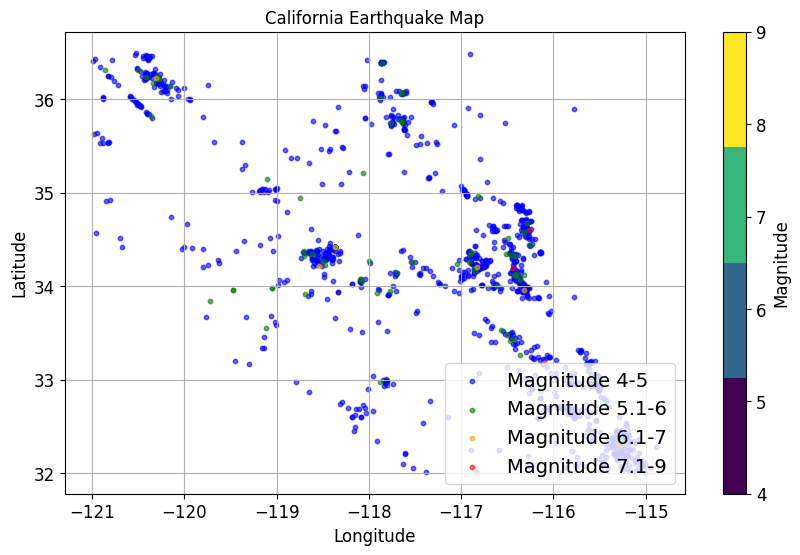

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHub URL dataset gempa bumi di California
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"

# Membaca dataset
df = pd.read_csv(github_url, sep=',')

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Calculate the center of the earthquake data region
center_lat = (max_lat + min_lat) / 2
center_lon = (max_lon + min_lon) / 2

# Calculate the appropriate zoom level to focus on the region with earthquake data
zoom_level = 8

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Create Map
plt.figure(figsize=(10, 6))
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    plt.scatter(mag_data['longitude'], mag_data['latitude'], s=10, alpha=0.6, c=color, label=label)

# Add Legend
plt.legend(loc='lower right')

# Added vertical colorbar for magnitude description
cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
norm = plt.Normalize(vmin=4, vmax=9)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Magnitude')

# Add Lable and Title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Earthquake Map')

# Display Map
plt.grid(True)
plt.show()


#**Frequency**

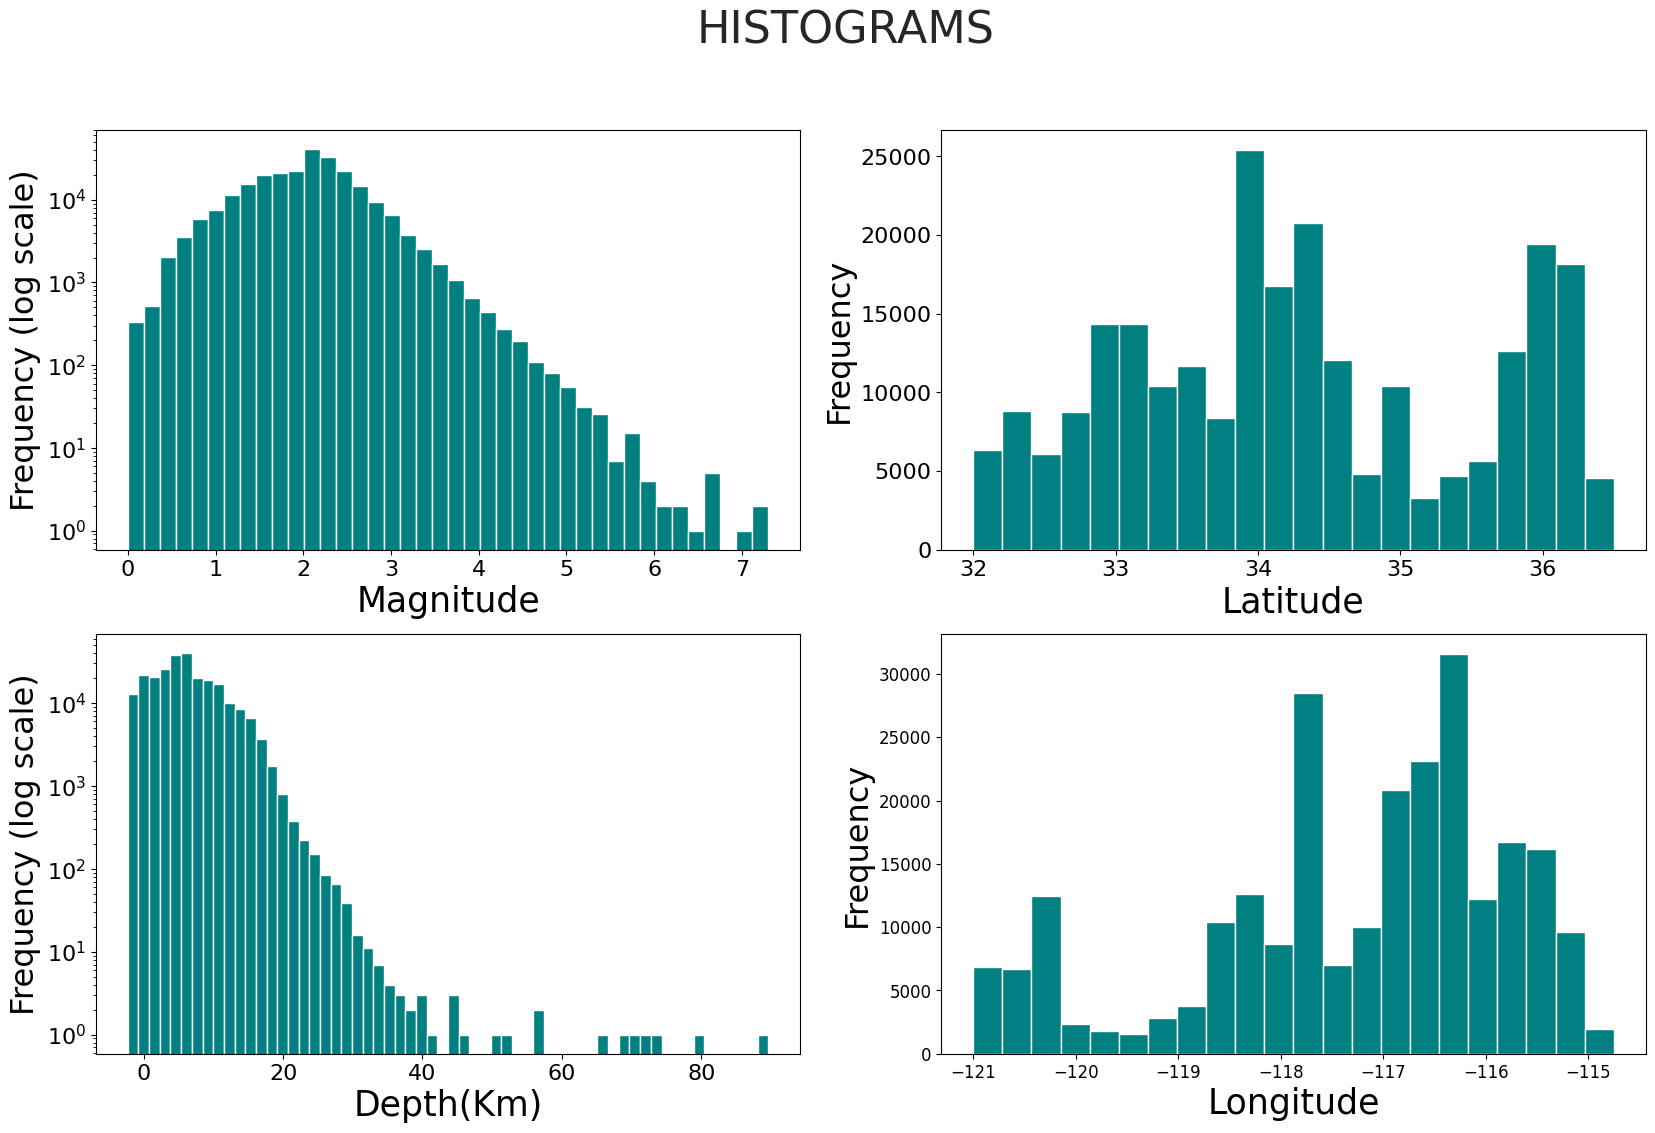

In [17]:
#fig=plt.figure()
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('HISTOGRAMS',fontsize=32)
# Draw a nested boxplot
axes[0][0].hist(df['mag'],bins=40,color='teal')
axes[1][0].hist(df['depth'],bins=60,color='teal')
axes[0][1].hist(df['latitude'],bins=22,color='teal')
axes[1][1].hist(df['longitude'],bins=22,color='teal')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Magnitude",fontsize=25) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23) #set font and title of y label
            ax.set_yscale('log') #set log scale
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Depth(Km)",fontsize=25)
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23)
            ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i == 0 and j==1:
            title = ax.set_xlabel("Latitude",fontsize=25  )
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            title = ax.set_xlabel("Longitude", fontsize=25 )
            title2 = ax.set_ylabel("Frequency",fontsize=23)


## **Depth, Latitude**

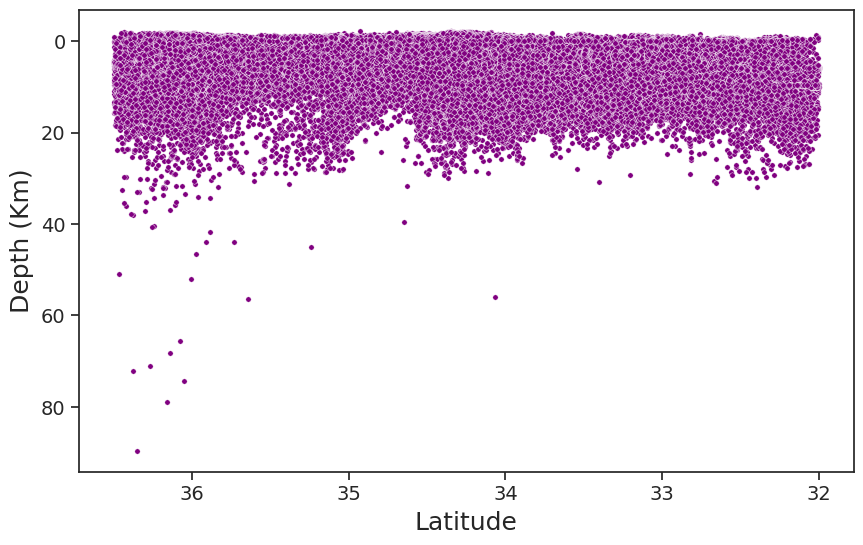

In [18]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

## **Depth, Longitude**

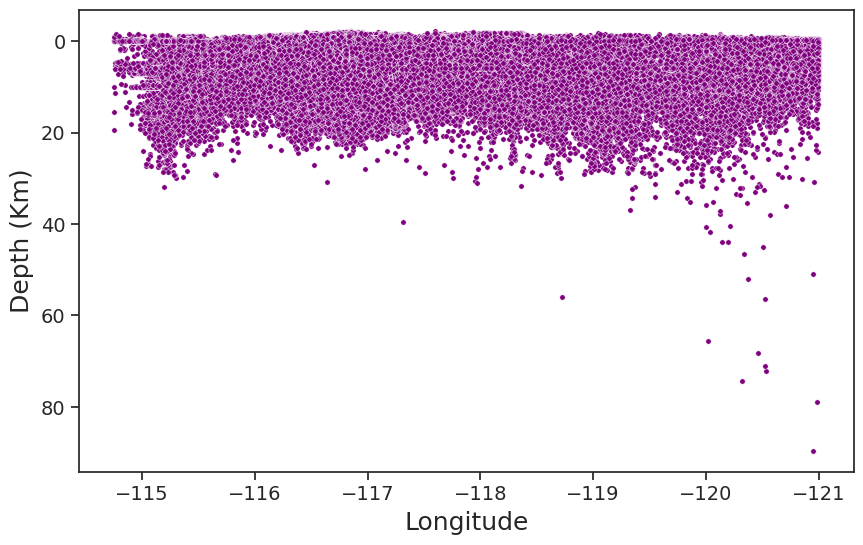

In [19]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

#**Break Location into Grid 1x1 (degree)**

<ipython-input-20-556ff83a6093>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
<ipython-input-20-556ff83a6093>:43: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


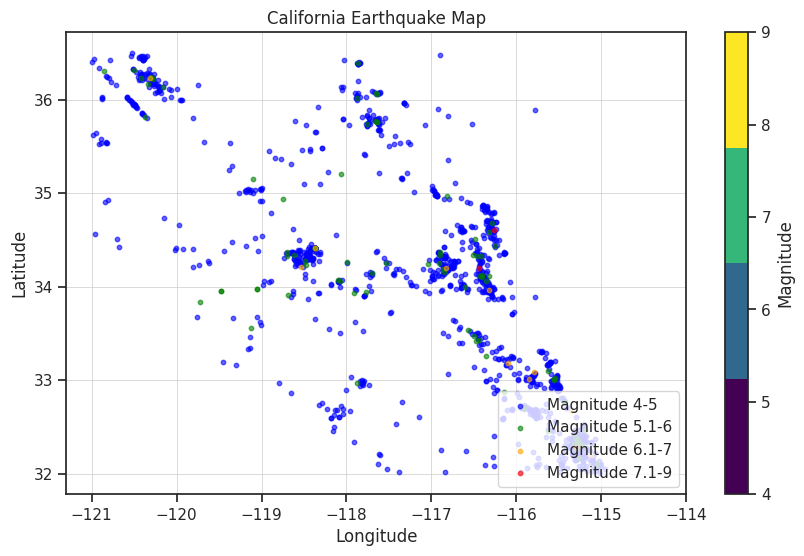

In [20]:
# Membaca dataset
df = pd.read_csv(dataset, sep=',')

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Calculate the center of the earthquake data region
center_lat = (max_lat + min_lat) / 2
center_lon = (max_lon + min_lon) / 2

# Calculate the appropriate zoom level to focus on the region with earthquake data
zoom_level = 8

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Create Map
plt.figure(figsize=(10, 6))
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    plt.scatter(mag_data['longitude'], mag_data['latitude'], s=10, alpha=0.6, c=color, label=label)

# Add Grid (1x1 degree interval)
plt.grid(linewidth=0.5)
plt.xticks(range(int(min_lon), int(max_lon) + 1, 1))  # Interval 1 derajat untuk longitude
plt.yticks(range(int(min_lat), int(max_lat) + 1, 1))  # Interval 1 derajat untuk latitude

# Add Legend
plt.legend(loc='lower right')

# Added vertical colorbar for magnitude description
cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
norm = plt.Normalize(vmin=4, vmax=9)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Magnitude')

# Add Labels and Title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Earthquake Map')

# Display Map
plt.show()


In [21]:
# Read dataset
df = pd.read_csv(dataset, sep=',')

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Print the latitude and longitude range
print("Range Latitude:", min_lat, "until", max_lat)
print("Range Longitude:", min_lon, "until", max_lon)


Range Latitude: 32.0 until 36.5
Range Longitude: -121.0 until -114.75


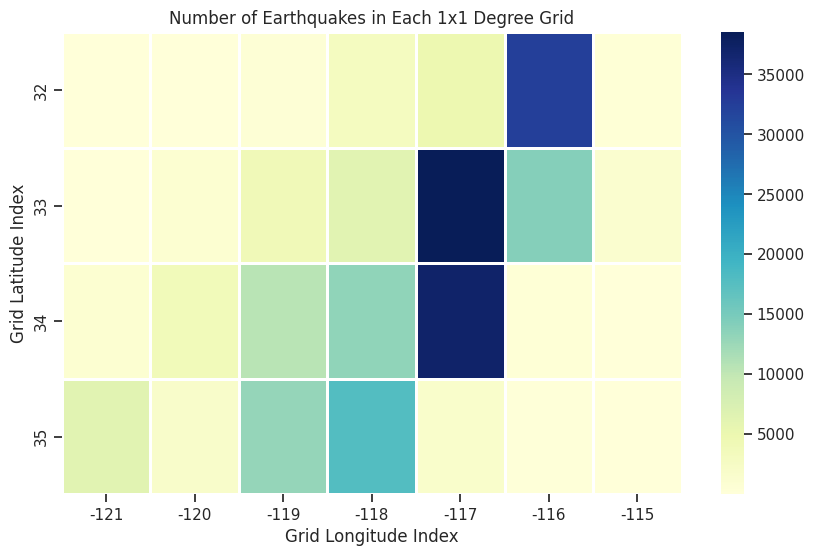

In [22]:
# Calculate Sum of Earthquake in grid 1x1 degree
lat_bins = np.arange(int(min_lat), int(max_lat) + 1, 1)
lon_bins = np.arange(int(min_lon), int(max_lon) + 1, 1)

grid_counts = np.zeros((len(lat_bins) - 1, len(lon_bins) - 1), dtype=int)

for i in range(len(lat_bins) - 1):
    for j in range(len(lon_bins) - 1):
        # Filter data within the current grid
        grid_data = df[
            (df['latitude'] >= lat_bins[i]) & (df['latitude'] < lat_bins[i + 1]) &
            (df['longitude'] >= lon_bins[j]) & (df['longitude'] < lon_bins[j + 1])
        ]
        # Count earthquakes in the grid
        grid_counts[i][j] = len(grid_data)

# save a result in DataFrame
grid_df = pd.DataFrame(grid_counts, index=range(int(min_lat), int(max_lat)), columns=range(int(min_lon), int(max_lon)))

# Display result
plt.figure(figsize=(10, 6))
sns.heatmap(grid_df, cmap='YlGnBu', linecolor='white', linewidth=1)
plt.xlabel('Grid Longitude Index')
plt.ylabel('Grid Latitude Index')
plt.title('Number of Earthquakes in Each 1x1 Degree Grid')
plt.show()


In [23]:
import pandas as pd
import numpy as np

# Calculate Sum of Earthquake in grid 1x1 degree
lat_bins = np.arange(int(min_lat), int(max_lat) + 1, 1)
lon_bins = np.arange(int(min_lon), int(max_lon) + 1, 1)

grid_counts = np.zeros((len(lat_bins) - 1, len(lon_bins) - 1), dtype=int)

for i in range(len(lat_bins) - 1):
    for j in range(len(lon_bins) - 1):
        # Filter data within the current grid
        grid_data = df[
            (df['latitude'] >= lat_bins[i]) & (df['latitude'] < lat_bins[i + 1]) &
            (df['longitude'] >= lon_bins[j]) & (df['longitude'] < lon_bins[j + 1])
        ]
        # Count earthquakes in the grid
        grid_counts[i][j] = len(grid_data)

# Save in DataFrame
grid_df = pd.DataFrame(grid_counts, index=range(int(min_lat), int(max_lat)), columns=range(int(min_lon), int(max_lon)))

# Display Result
print("Table of Number of Earthquakes in Each 1x1 Degree Grid:")
print(grid_df)

Table of Number of Earthquakes in Each 1x1 Degree Grid:
    -121  -120   -119   -118   -117   -116  -115
32     3    22    583   3140   4911  32418   436
33   148   906   4020   6411  38522  14091  1234
34   951  3851  10634  13308  37093    436     3
35  6439  1872  12997  17878   1756    204    29
